### task : Sales Prediction using Python

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [13]:
data = pd.read_csv('advertising.csv')
print("Dataset preview:")
print(data.head())

Dataset preview:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [14]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:

y_pred = model.predict(X_test)

In [18]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:',mse)
print('R-squared Score:',r2)

Mean Squared Error: 2.9077569102710896
R-squared Score: 0.9059011844150826


In [19]:
# Save the trained model
with open('sales_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully as 'sales_model.pkl'")


Model saved successfully as 'sales_model.pkl'


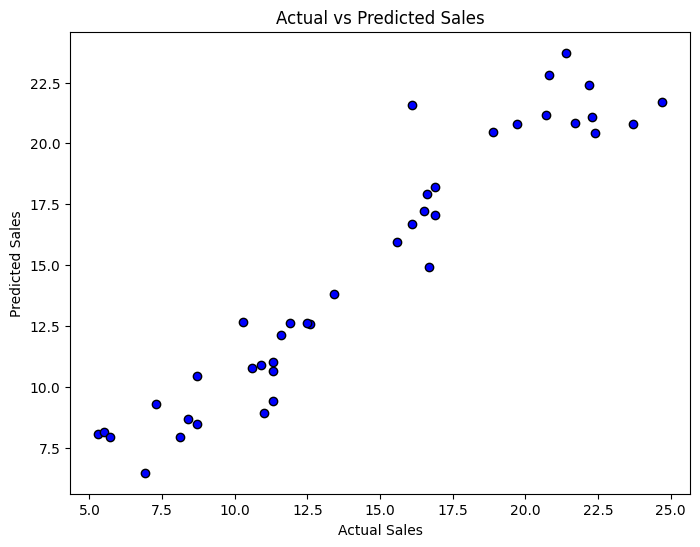

In [20]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [23]:
import numpy as np
import pickle


with open('sales_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Function to take user input and predict sales
def predict_sales():
    try:
        # Get user input
        TV = float(input("Enter TV advertising budget: "))
        radio = float(input("Enter radio advertising budget: "))
        newspaper = float(input("Enter newspaper advertising budget: "))

        # Create feature array
        features = np.array([[TV, radio, newspaper]])

        # Predict sales
        predicted_sales = model.predict(features)[0]

        print("Predicted Sales: ",predicted_sales)

    except ValueError:
        print("Invalid input! Please enter numeric values.")

# Run the prediction function
predict_sales()


Enter TV advertising budget:  400
Enter radio advertising budget:  50
Enter newspaper advertising budget:  80


Predicted Sales:  31.912034602512556


C:\Users\adars\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
